# 🚀 Optimizers in Deep Learning

---

## 🧠 What are Optimizers?

Optimizers are algorithms that **adjust model parameters (like weights and biases)** during training to minimize the **loss function**.

They play a crucial role in how fast and how well a neural network learns by:
- Updating weights using gradients.
- Reducing the error (loss) over time.

---

## 🔄 Gradient Descent (GD)

Gradient Descent is the most fundamental optimization algorithm in deep learning.

### 🔁 Update Rule:
$$
\theta = \theta - \eta \cdot \nabla J(\theta)
$$
Where:
- $\theta $: model parameters (weights)
- $ \eta $: learning rate
- $ J(\theta) $: loss function
- $ \nabla J(\theta) $: gradient of loss w.r.t parameters

---

## 🧩 Types of Gradient Descent

| Type              | Description |
|------------------|-------------|
| **Batch GD**      | Uses **entire dataset** to compute gradient per step. Slow but stable. |
| **Stochastic GD** | Uses **one random sample** at a time. Fast but noisy. |
| **Mini-Batch GD** | Uses a **small batch** of samples. Balance of speed & stability. ✅ |

---

## ⚠️ Challenges in Optimization

1. **Choosing the right learning rate**  
2. **Learning rate scheduling** – how learning rate changes during training  
3. **Handling multiple minima** in the loss landscape  
4. **Local minima** – not global but still "low" points  
5. **Saddle points** – gradient near zero, but not a minimum

---

# 📉 Exponentially Weighted Moving Average (EWMA)

EWMA is a smoothing technique used for:
- **Time series forecasting**
- **Trend detection** (e.g., in stock prices, temperature, etc.)

### 🧮 Formula:
$$
v_t = \beta \cdot v_{t-1} + (1 - \beta) \cdot x_t
$$

Where:
- $x_t $: value at time step $ t $
- $ \beta $: smoothing constant (0 < β < 1)
- More recent values get **higher weight**.

---

# ⚡ SGD with Momentum

SGD with momentum helps accelerate gradient descent in the **relevant direction** and dampens oscillations.

### 🧮 Update Rule:
$$
v_t = \beta \cdot v_{t-1} + (1 - \beta) \cdot \nabla J(\theta) \\
\theta = \theta - \eta \cdot v_t
$$

- $\beta $: momentum term (e.g., 0.9)
- Helps escape **local minima** and **saddle points**

---

# 🏎️ Nesterov Accelerated Gradient (NAG)

Improves on momentum by **looking ahead** at the future position based on current momentum.

### 🧮 Update Rule:
1. Lookahead:  
   $$
   \theta_{\text{lookahead}} = \theta - \beta \cdot v_{t-1}
   $$
2. Compute gradient at lookahead:  
   $$
   \nabla J(\theta_{\text{lookahead}})
   $$
3. Final update:  
   $$
   v_t = \beta \cdot v_{t-1} + \eta \cdot \nabla J(\theta_{\text{lookahead}}) \\
   \theta = \theta - v_t
   $$

✅ Better convergence than standard momentum.  
❌ May cause oscillation near minima.

---

# 🧠 AdaGrad (Adaptive Gradient)

Adjusts learning rate **individually per parameter** based on historical gradients.

### 🧮 Update Rule:
$$
\theta = \theta - \frac{\eta}{\sqrt{G_t + \epsilon}} \cdot \nabla J(\theta)
$$

- $ G_t $: sum of squares of all past gradients
- Works well for **sparse data** and **features with different scales**
- ❌ Learning rate shrinks too much over time

---

# 🌀 RMSProp (Root Mean Square Propagation)

Fixes AdaGrad's learning rate decay by using **exponential moving average** of squared gradients.

### 🧮 Update Rule:
$$
E[g^2]_t = \beta E[g^2]_{t-1} + (1 - \beta) g_t^2 \\
\theta = \theta - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} \cdot g_t
$$

✅ Solves elongated bowl problem  
✅ Common default in RNNs

---

# 🤖 Adam (Adaptive Moment Estimation)

Adam = RMSProp + Momentum  
Maintains **two moving averages**:
- $ m_t $: first moment (mean of gradients)
- $ v_t $: second moment (uncentered variance)

### 🧮 Update Rule:
$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t \\
v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2
$$

### 🧮 Bias Correction:
$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$$

### 🧮 Final Parameter Update:
$$
\theta = \theta - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \cdot \hat{m}_t
$$

- Typical values: $ \beta_1 = 0.9 $, $\beta_2 = 0.999 $, $ \epsilon = 10^{-8} $
- ✅ Works well in most cases
- ✅ Default optimizer in many frameworks

---

## 📚 Summary of Optimizers

| Optimizer | Key Feature | Good For | Issues |
|----------|-------------|----------|--------|
| **SGD** | Simple & fast | General use | Can get stuck in local minima |
| **Momentum** | Faster convergence | Deep networks | Oscillations |
| **NAG** | Lookahead gradient | Faster convergence | Sensitive |
| **AdaGrad** | Adapts to sparse data | NLP, sparse features | Shrinks LR too much |
| **RMSProp** | Fixes AdaGrad | RNNs | Sensitive to tuning |
| **Adam** | Combines Momentum + RMS | Most tasks | Can overfit if not tuned |

---

## 🧪 Optimizers in Keras

```python
from keras.optimizers import SGD, RMSprop, Adam

# SGD with momentum and Nesterov
opt = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

# RMSProp
opt = RMSprop(learning_rate=0.001, rho=0.9)

# Adam
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)


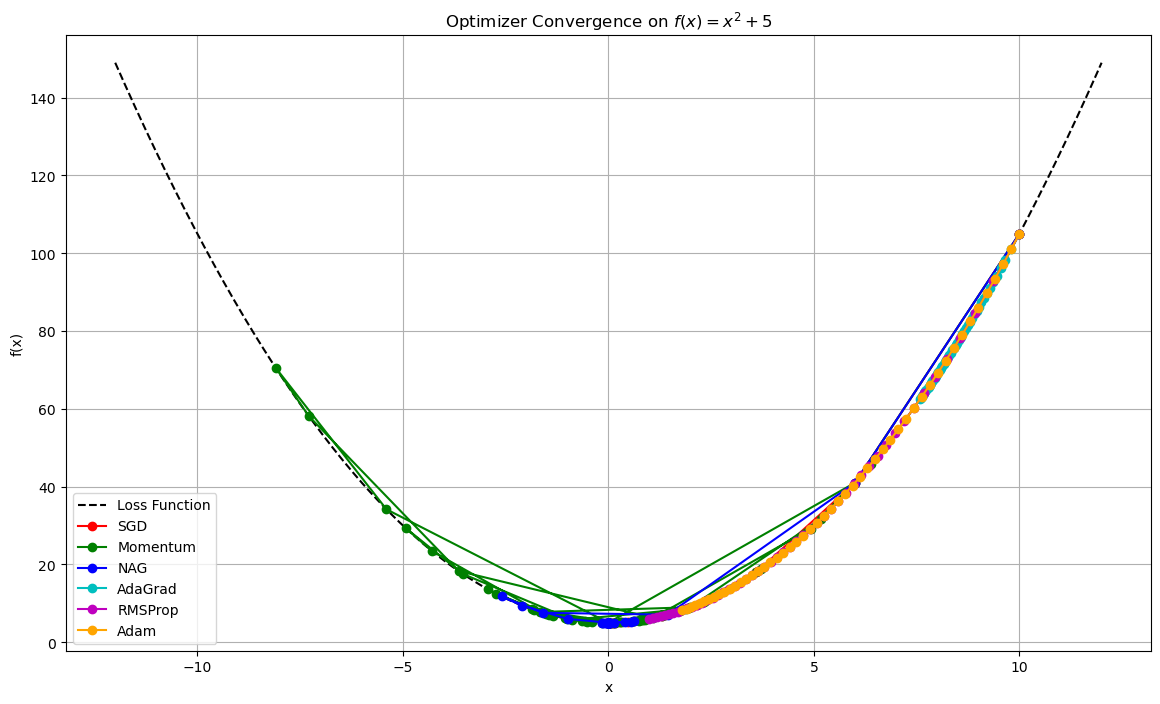

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function
def f(x):
    return x**2 + 5

# Gradient of the function
def grad(x):
    return 2 * x

# Optimizers
def sgd(x0, lr, epochs):
    x = x0
    path = [x]
    for _ in range(epochs):
        x -= lr * grad(x)
        path.append(x)
    return path

def momentum(x0, lr, epochs, beta=0.9):
    x = x0
    v = 0
    path = [x]
    for _ in range(epochs):
        v = beta * v + lr * grad(x)
        x -= v
        path.append(x)
    return path

def nag(x0, lr, epochs, beta=0.9):
    x = x0
    v = 0
    path = [x]
    for _ in range(epochs):
        lookahead = x - beta * v
        v = beta * v + lr * grad(lookahead)
        x -= v
        path.append(x)
    return path

def adagrad(x0, lr, epochs, eps=1e-8):
    x = x0
    G = 0
    path = [x]
    for _ in range(epochs):
        g = grad(x)
        G += g**2
        x -= (lr / (np.sqrt(G) + eps)) * g
        path.append(x)
    return path

def rmsprop(x0, lr, epochs, beta=0.9, eps=1e-8):
    x = x0
    E = 0
    path = [x]
    for _ in range(epochs):
        g = grad(x)
        E = beta * E + (1 - beta) * g**2
        x -= (lr / (np.sqrt(E) + eps)) * g
        path.append(x)
    return path

def adam(x0, lr, epochs, beta1=0.9, beta2=0.999, eps=1e-8):
    x = x0
    m, v = 0, 0
    path = [x]
    for t in range(1, epochs+1):
        g = grad(x)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g**2
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        x -= (lr / (np.sqrt(v_hat) + eps)) * m_hat
        path.append(x)
    return path

# Hyperparameters
x0 = 10
lr = 0.2
epochs = 50

# Run all optimizers
paths = {
    'SGD': sgd(x0, lr, epochs),
    'Momentum': momentum(x0, lr, epochs),
    'NAG': nag(x0, lr, epochs),
    'AdaGrad': adagrad(x0, lr, epochs),
    'RMSProp': rmsprop(x0, lr, epochs),
    'Adam': adam(x0, lr, epochs)
}

# Plotting
x_vals = np.linspace(-12, 12, 400)
y_vals = f(x_vals)

plt.figure(figsize=(14, 8))
plt.plot(x_vals, y_vals, 'k--', label='Loss Function')

colors = ['r', 'g', 'b', 'c', 'm', 'orange']

for (name, path), color in zip(paths.items(), colors):
    path = np.array(path)
    plt.plot(path, f(path), marker='o', label=name, color=color)

plt.title("Optimizer Convergence on $f(x) = x^2 + 5$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\goura\AppData\Local\Temp\ipykernel_14772\1138654576.py:127: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\goura\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


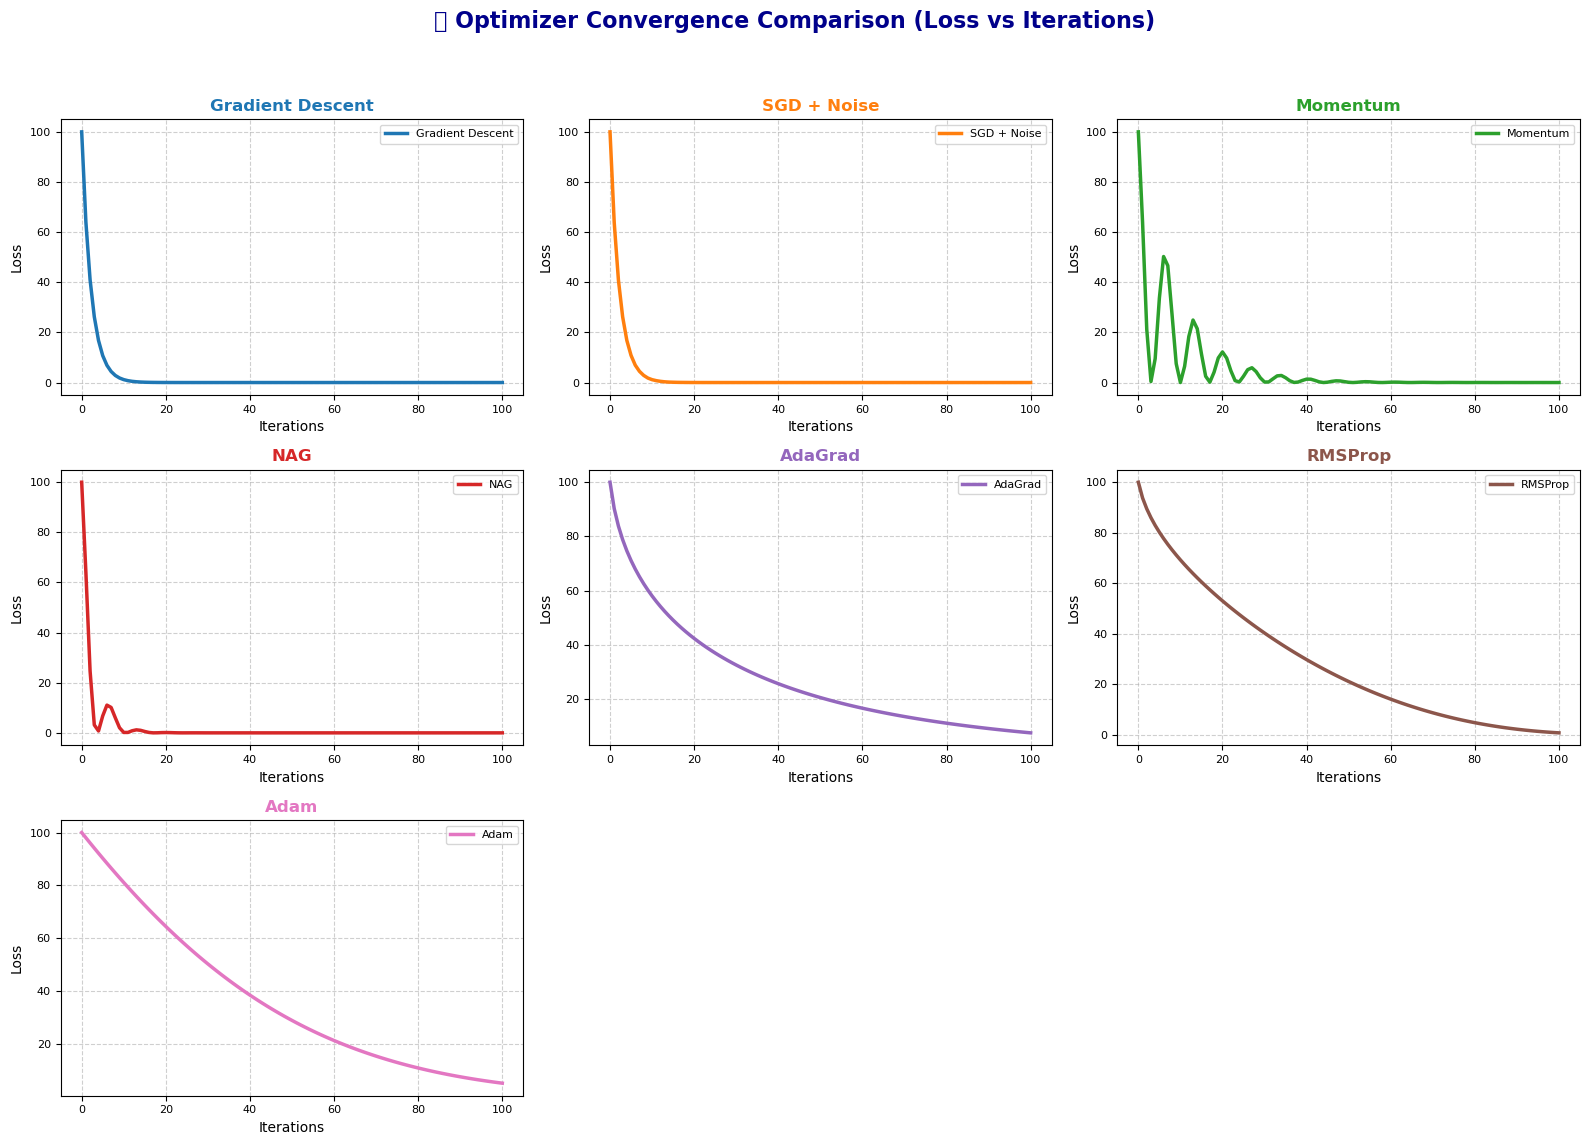

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function and gradient
def f(x):
    return x**2

def grad_f(x):
    return 2 * x

# Optimizers
def gradient_descent(x0, lr=0.1, steps=100):
    x = x0
    history = [x]
    for _ in range(steps):
        x -= lr * grad_f(x)
        history.append(x)
    return history

def sgd_noise(x0, lr=0.1, steps=100):
    x = x0
    history = [x]
    for _ in range(steps):
        noise = np.random.randn() * 0.1
        x -= lr * (grad_f(x) + noise)
        history.append(x)
    return history

def momentum_sgd(x0, lr=0.1, momentum=0.9, steps=100):
    x = x0
    v = 0
    history = [x]
    for _ in range(steps):
        v = momentum * v - lr * grad_f(x)
        x += v
        history.append(x)
    return history

def nesterov(x0, lr=0.1, momentum=0.9, steps=100):
    x = x0
    v = 0
    history = [x]
    for _ in range(steps):
        lookahead = x + momentum * v
        grad = grad_f(lookahead)
        v = momentum * v - lr * grad
        x += v
        history.append(x)
    return history

def adagrad(x0, lr=0.5, steps=100, epsilon=1e-8):
    x = x0
    grad_sq = 0
    history = [x]
    for _ in range(steps):
        g = grad_f(x)
        grad_sq += g**2
        x -= (lr / (np.sqrt(grad_sq) + epsilon)) * g
        history.append(x)
    return history

def rmsprop(x0, lr=0.1, beta=0.9, steps=100, epsilon=1e-8):
    x = x0
    eg = 0
    history = [x]
    for _ in range(steps):
        g = grad_f(x)
        eg = beta * eg + (1 - beta) * g**2
        x -= lr * g / (np.sqrt(eg) + epsilon)
        history.append(x)
    return history

def adam(x0, lr=0.1, steps=100, beta1=0.9, beta2=0.999, epsilon=1e-8):
    x = x0
    m = 0
    v = 0
    history = [x]
    for t in range(1, steps + 1):
        g = grad_f(x)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g**2
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        x -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
        history.append(x)
    return history

# Optimizer setup
optimizers = {
    "Gradient Descent": gradient_descent,
    "SGD + Noise": sgd_noise,
    "Momentum": momentum_sgd,
    "NAG": nesterov,
    "AdaGrad": adagrad,
    "RMSProp": rmsprop,
    "Adam": adam,
}

# Colors for visual distinction
colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c",
    "#d62728", "#9467bd", "#8c564b", "#e377c2"
]

# Plotting
x0 = 10.0
steps = 100
fig, axes = plt.subplots(3, 3, figsize=(16, 12), facecolor='white')
axes = axes.flatten()

for i, (name, opt_fn) in enumerate(optimizers.items()):
    history = opt_fn(x0, steps=steps)
    losses = [f(x) for x in history]
    axes[i].plot(losses, color=colors[i], linewidth=2.5, label=name)
    axes[i].set_title(name, fontsize=12, fontweight='bold', color=colors[i])
    axes[i].set_xlabel("Iterations", fontsize=10)
    axes[i].set_ylabel("Loss", fontsize=10)
    axes[i].grid(True, linestyle='--', alpha=0.6)
    axes[i].tick_params(labelsize=8)
    axes[i].legend(loc='upper right', fontsize=8)

# Hide any unused subplots
for j in range(len(optimizers), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("📉 Optimizer Convergence Comparison (Loss vs Iterations)", fontsize=16, fontweight='bold', color='darkblue')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
